LESSON 02: FUNDAMENTALS OF ML AND STATISTICAL LEARNING

**1. Metadata**

This dataset contains information about the top-rated 9,000 movies from The Movie Database (TMDB). It includes key details like movie titles, release dates, popularity, user ratings, and genre classifications. This dataset can be used to analyze trends in movie ratings, popularity, and genre distribution over time.



*   id: A unique identifier for each movie on TMDB.
*   title: The title of the movie.
*   original_language: The language in which the movie was originally made. Common values include "en" for English, "fr" for French, etc.
*   release_date: The date when the movie was released, in the format YYYY-MM-DD.
*   vote_average: The average rating of the movie, based on user ratings on TMDB.
*   vote_count: The total number of user votes or ratings that the movie has received.
*   popularity: A measure of the movie's popularity on TMDB, based on factors like views, ratings, and social media mentions.
*    overview: A brief summary or synopsis of the movie's plot.
*    genre_ids: A list of numeric IDs representing the genres of the movie.
*    Genres: A list of the genres associated with the movie, expressed in human-readable format (e.g., Drama, Crime, etc.).



In [13]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [14]:
# Define the column names as a list
column_names = ['id', 'title', 'original_language', 'release_date', 'vote_average', 'vote_count',
                'popularity', 'overview', 'genre_ids', 'Genres']

**2. Load Dataset**

In [15]:
dataset = pd.read_csv("/content/sample_data/top_rated_9000_movies_on_TMDB.csv")
dataset.head()

,id,title,original_language,release_date,vote_average,vote_count,popularity,overview,genre_ids,Genres
0,278,The Shawshank Redemption,en,1994-09-23,8.706,26840,150.307,Imprisoned in the 1940s for the double murder ...,"[18, 80]","['Drama', 'Crime']"
1,238,The Godfather,en,1972-03-14,8.690,20373,122.973,"Spanning the years 1945 to 1955, a chronicle o...","[18, 80]","['Drama', 'Crime']"
2,240,The Godfather Part II,en,1974-12-20,8.575,12291,94.204,In the continuing saga of the Corleone crime f...,"[18, 80]","['Drama', 'Crime']"
3,424,Schindler's List,en,1993-12-15,8.565,15695,74.615,The true story of how businessman Oskar Schind...,"[18, 36, 10752]","['Drama', 'History', 'War']"
4,389,12 Angry Men,en,1957-04-10,8.546,8522,54.678,The defense and the prosecution have rested an...,[18],['Drama']


In [16]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  9630
#Features =  10


In [17]:
# checking the missing values
dataset[dataset.eq("?").any(axis=1)].head()

,id,title,original_language,release_date,vote_average,vote_count,popularity,overview,genre_ids,Genres


In [18]:
#checking the missing values
dataset[dataset.isna().any(axis=1)].head()
print("#Samples with missing values = ", len(dataset[dataset.isna().any(axis=1)]))

#Samples with missing values =  0


In [19]:
#Convert release_date to datetime format
dataset['release_date'] = pd.to_datetime(dataset['release_date'], errors='coerce')

#Display the data types to confirm the change
dataset.dtypes

,0
id,int64
title,object
original_language,object
release_date,datetime64[ns]
vote_average,float64
vote_count,int64
popularity,float64
overview,object
genre_ids,object
Genres,object


**3. Descriptive Statistical Analysis**

**Numerical variables**

In [20]:
# list of numerical variables
numerical_cols = ["vote_average", "vote_count","popularity"]

Histogram with Frequencies

In [21]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    plt.figure(figsize=(10, 6))
    sbn.histplot(data[column], color = "blue", bins = bins, kde = True)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)
    plt.show()

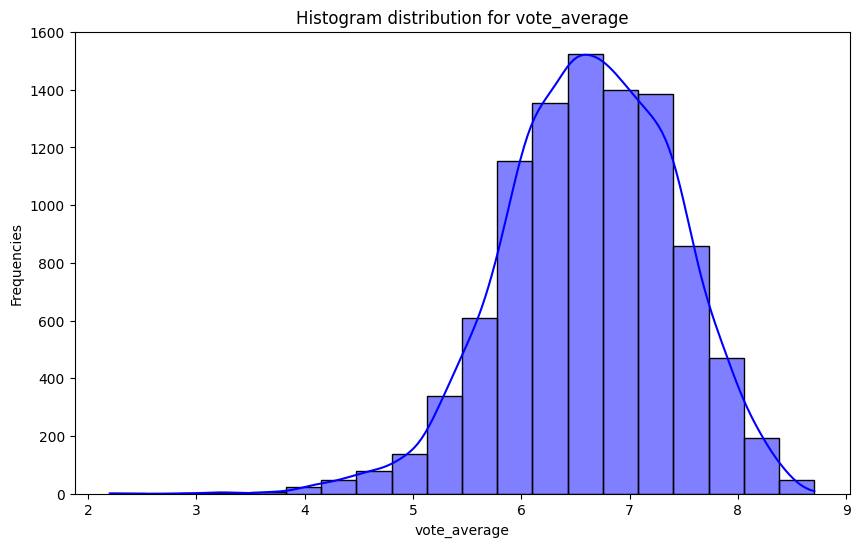

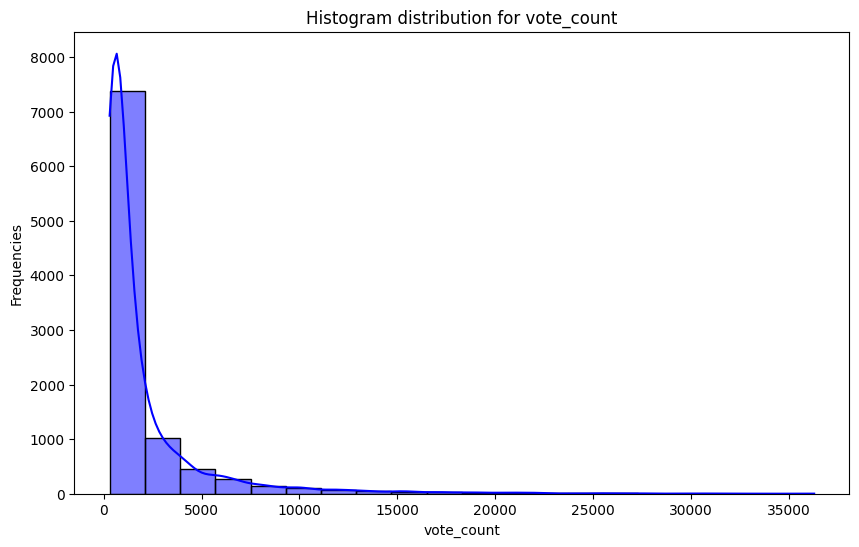

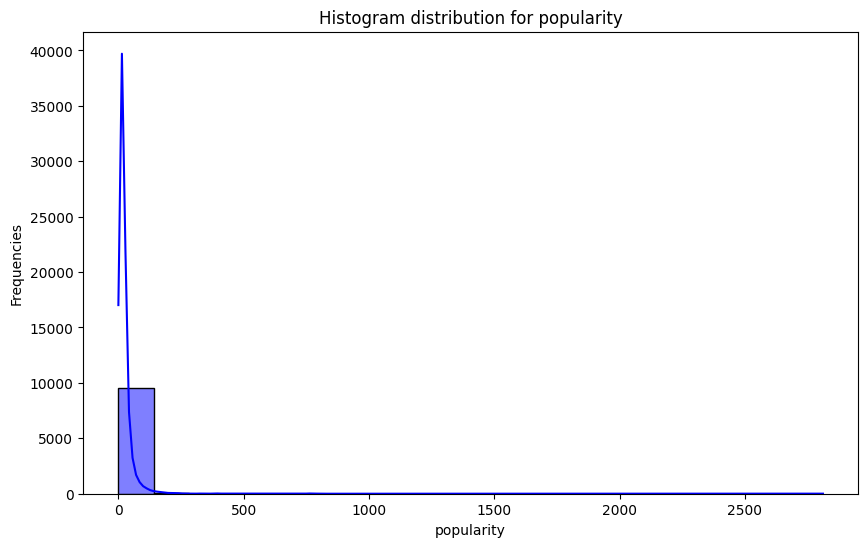

In [22]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 20)

Box Plot

In [23]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 3
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

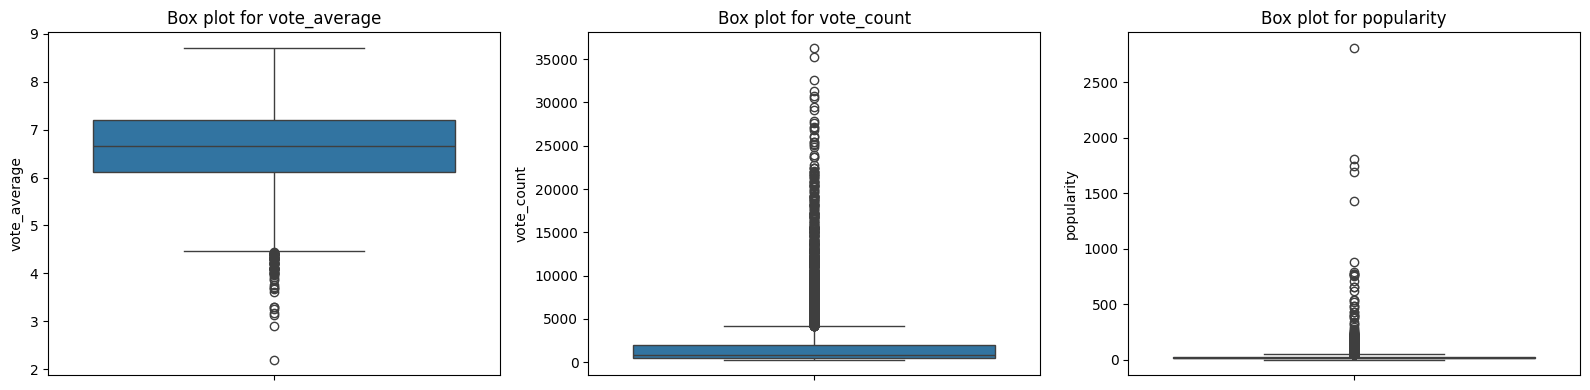

In [24]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

Statistical metrics

In [25]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,vote_average,vote_count,popularity
count,9630.000000,9630.000000,9630.000000
mean,6.633820,1976.992004,25.522728
std,0.783581,3124.089193,58.278888
min,2.200000,300.000000,0.018000
25%,6.106000,468.000000,10.780250
50%,6.659000,843.000000,15.620000
75%,7.200000,1964.750000,25.325000
max,8.706000,36306.000000,2811.772000


Correlation Analysis

In [26]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()
    plt.show()

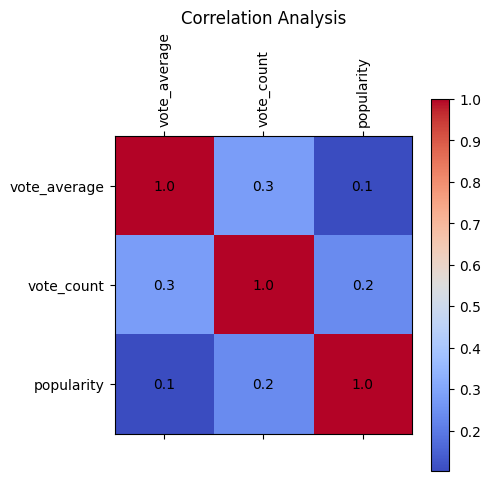

In [27]:
plot_correlation(dataset, numerical_cols)

Outliers detection using Z-Score

In [28]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)

    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

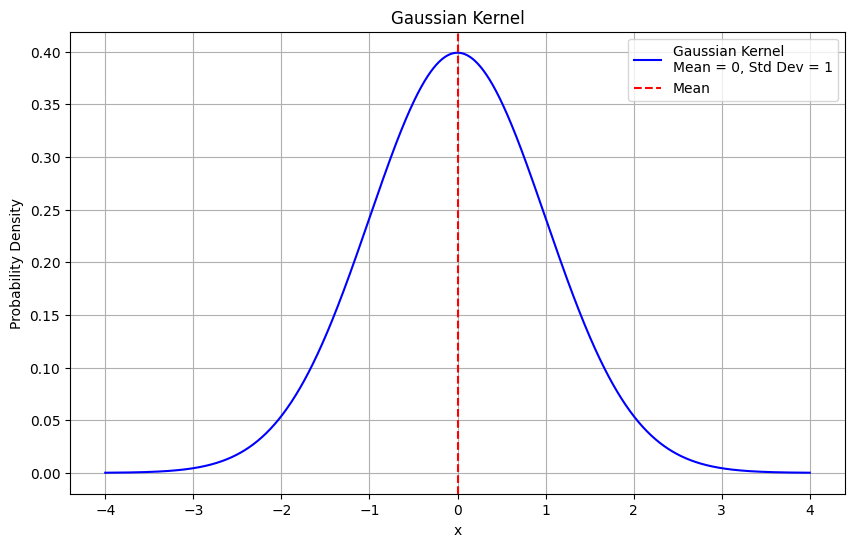

In [31]:
# standard gaussian kernel
plot_gaussian_kernel(mean=0, std_dev=1)

In [32]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile

In [33]:
call_percentile(z = -2)

2.275

In [34]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)

    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]

    return outliers

In [36]:
outliers_detection(dataset, "popularity").head()

,id,title,original_language,release_date,vote_average,vote_count,popularity,overview,genre_ids,Genres
0,278,The Shawshank Redemption,en,1994-09-23,8.706,26840,150.307,Imprisoned in the 1940s for the double murder ...,"[18, 80]","['Drama', 'Crime']"
1,238,The Godfather,en,1972-03-14,8.690,20373,122.973,"Spanning the years 1945 to 1955, a chronicle o...","[18, 80]","['Drama', 'Crime']"
5,129,Spirited Away,ja,2001-07-20,8.537,16339,108.463,"A young girl, Chihiro, becomes trapped in a st...","[16, 10751, 14]","['Animation', 'Family', 'Fantasy']"
7,155,The Dark Knight,en,2008-07-16,8.516,32576,148.284,Batman raises the stakes in his war on crime. ...,"[18, 28, 80, 53]","['Drama', 'Action', 'Crime', 'Thriller']"
12,122,The Lord of the Rings: The Return of the King,en,2003-12-17,8.480,23948,198.343,As armies mass for a final battle that will de...,"[12, 14, 28]","['Adventure', 'Fantasy', 'Action']"


In [37]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in vote_average ***
#samples outlier to distribution = 439
%outliers = 4.56 %

*** Outliers detection in vote_count ***
#samples outlier to distribution = 421
%outliers = 4.37 %

*** Outliers detection in popularity ***
#samples outlier to distribution = 440
%outliers = 4.57 %


**Categorical Variables**

In [45]:
# list of categorical variables
categorical_vars = ["original_language"]

Count instances for each categorical column

In [46]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** original_language ******
original_language
en    7640
fr     616
it     344
ja     266
es     177
de      91
ko      83
zh      58
cn      56
ru      45
sv      36
pt      30
hi      29
da      29
no      21
pl      16
th      11
fa      11
tr      10
nl       9
fi       8
id       5
hu       5
sr       4
cs       3
te       3
el       3
ar       2
uk       2
is       2
et       1
bn       1
sh       1
ga       1
ro       1
gl       1
bs       1
ml       1
la       1
tn       1
he       1
km       1
eu       1
hy       1
lt       1
Name: count, dtype: int64


In [47]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

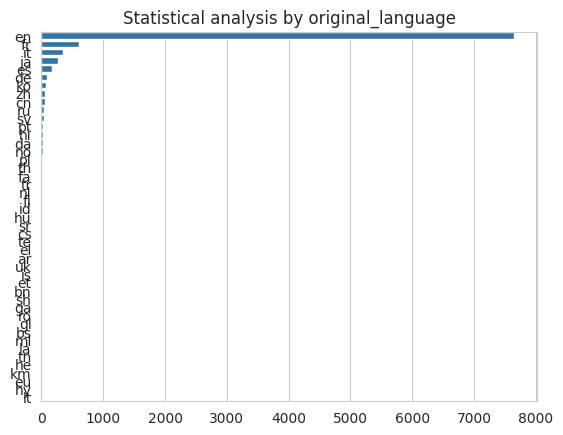

In [48]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

In [49]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

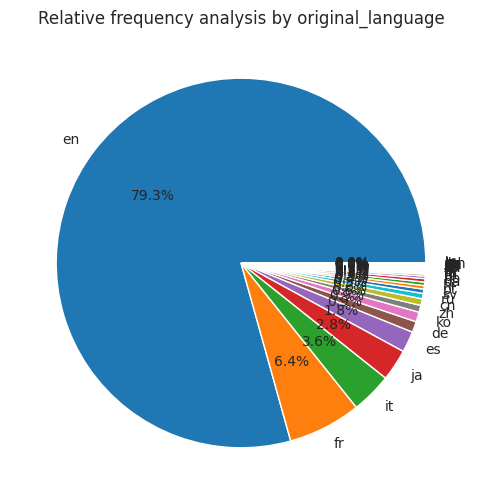

In [50]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

Statistical Analysis for subgroups

In [54]:
# create groups organized by sex and income
group_language_popularity = dataset.groupby(["original_language", "Genres"]).size().reset_index(name = "samples")
print(group_language_popularity)

     original_language                                             Genres  \
0                   ar                                          ['Drama']   
1                   bn                                          ['Drama']   
2                   bs                       ['Action', 'History', 'War']   
3                   cn  ['Action', 'Adventure', 'Comedy', 'Crime', 'Dr...   
4                   cn       ['Action', 'Adventure', 'Comedy', 'Romance']   
...                ...                                                ...   
2825                zh                                         ['Horror']   
2826                zh                ['Romance', 'Animation', 'Fantasy']   
2827                zh  ['Science Fiction', 'Action', 'Adventure', 'Th...   
2828                zh             ['Science Fiction', 'Action', 'Drama']   
2829                zh                                ['Science Fiction']   

      samples  
0           2  
1           1  
2           1  
3          

In [55]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Original language')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Language and Popularity')
    plt.tight_layout()
    plt.show()